# **CASE: FATURAMENTO EM** ***E-COMMERCE***
---

### Leitura da base de dados

In [1]:
dados_faturamento <- read.table(file   = "../Dados/Faturamento.txt",
                                sep    = "\t",
                                header = TRUE)

### Visualização da base de dados

In [2]:
View(dados_faturamento)

COD_PRODUTO,INVESTIMENTO,FATURAMENTO
<chr>,<int>,<int>
C_0001,20500,526400
C_0002,17500,312200
C_0003,18500,429200
C_0004,14500,470900
C_0005,12000,407100
C_0006,18800,339800
C_0007,18700,335900
C_0008,15000,361300
C_0009,16700,341700


### Análise exploratória breve

In [3]:
# Medidas resumo
summary(dados_faturamento)

 COD_PRODUTO         INVESTIMENTO    FATURAMENTO    
 Length:50          Min.   :10000   Min.   :198000  
 Class :character   1st Qu.:15550   1st Qu.:326375  
 Mode  :character   Median :17750   Median :361200  
                    Mean   :17784   Mean   :370074  
                    3rd Qu.:20425   3rd Qu.:433025  
                    Max.   :24500   Max.   :526400  

In [4]:
# Comando auxiliar para para omitir notação científica nos p-valores e no eixo vertical dos histogramas e controlar largura dos outputs na tela do Colab
options(scipen = 999, width = 200)

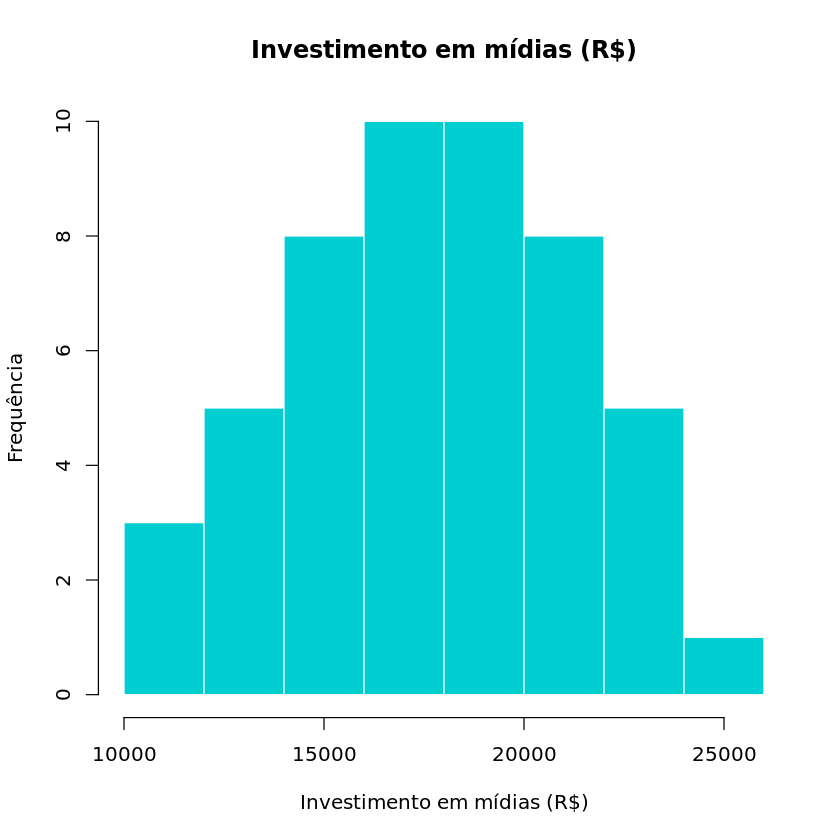

In [5]:
# Histograma do investimento em mídias
hist(dados_faturamento$INVESTIMENTO,
     main = "Investimento em mídias (R$)",
     col = "darkturquoise",
     border = "white",
     xlab = "Investimento em mídias (R$)",
     ylab = "Frequência",
     breaks = 10)

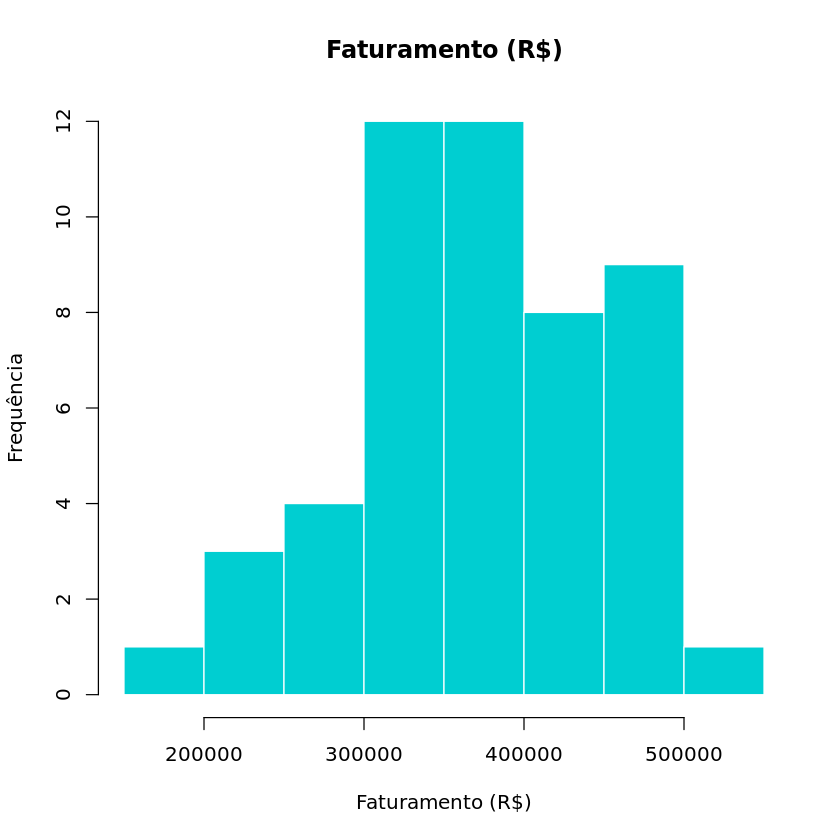

In [6]:
# Histograma do faturamento
hist(dados_faturamento$FATURAMENTO,
     main = "Faturamento (R$)",
     col = "darkturquoise",
     border = "white",
     xlab = "Faturamento (R$)",
     ylab = "Frequência",
     breaks = 10)

### Análise bivariada: variável resposta vs. variáveis explicativas

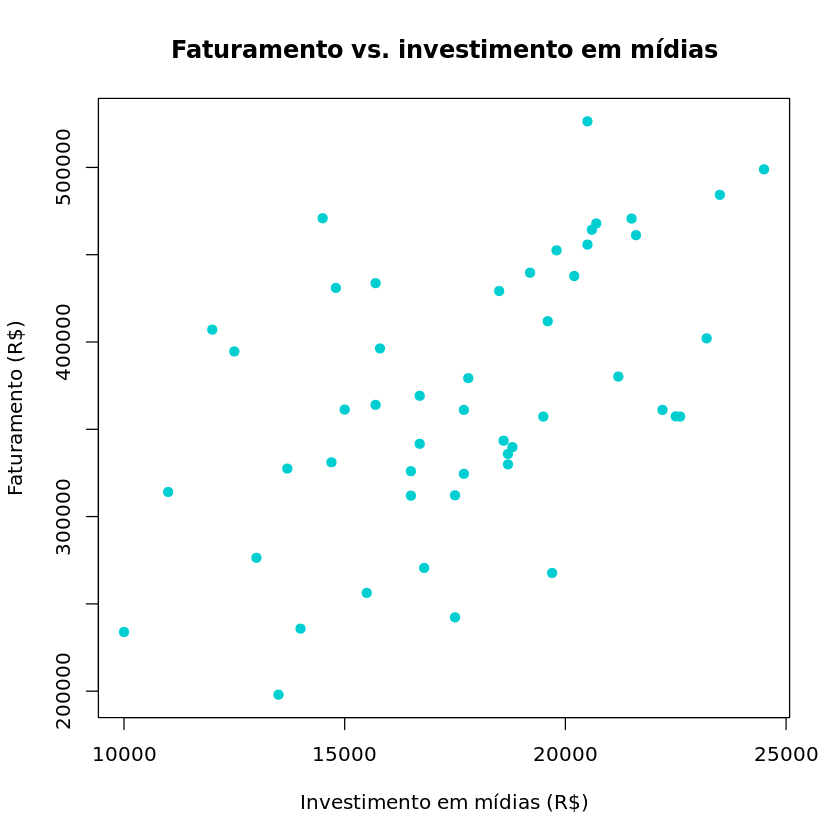

In [7]:
# Gráfico de dispersão
plot(x    = dados_faturamento$INVESTIMENTO,
     y    = dados_faturamento$FATURAMENTO,
     pch  = 19,
     col  = "darkturquoise",
     xlab = "Investimento em mídias (R$)",
     ylab = "Faturamento (R$)",
     main = "Faturamento vs. investimento em mídias")

In [8]:
# Coeficiente de correlação
cor(dados_faturamento$INVESTIMENTO,
    dados_faturamento$FATURAMENTO)

[1] 0.5216438

### Modelo de regressão linear simples

In [9]:
# Ajuste do modelo
regressao <- lm(FATURAMENTO ~ INVESTIMENTO,
                data = dados_faturamento)

summary(regressao)


Call:
lm(formula = FATURAMENTO ~ INVESTIMENTO, data = dados_faturamento)

Residuals:
    Min      1Q  Median      3Q     Max 
-124878  -44709    1321   50524  139397 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  161198.006  50190.999   3.212 0.002357 ** 
INVESTIMENTO     11.745      2.773   4.236 0.000102 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 66240 on 48 degrees of freedom
Multiple R-squared:  0.2721,	Adjusted R-squared:  0.2569 
F-statistic: 17.94 on 1 and 48 DF,  p-value: 0.0001024


### Intervalos de confiança

In [10]:
# Intercepto (beta 0)
print("Limite inferior")
as.numeric(regressao$coefficients[1] - 1.96 * coef(summary(regressao))[1, "Std. Error"])
print("Limite superior")
as.numeric(regressao$coefficients[1] + 1.96 * coef(summary(regressao))[1, "Std. Error"])

[1] "Limite inferior"


[1] 62823.65

[1] "Limite superior"


[1] 259572.4

In [11]:
# Ângulo (beta 1)
print("Limite inferior")
as.numeric(regressao$coefficients[2] - 1.96 * coef(summary(regressao))[2, "Std. Error"])
print("Limite superior")
as.numeric(regressao$coefficients[2] + 1.96 * coef(summary(regressao))[2, "Std. Error"])

[1] "Limite inferior"


[1] 6.31075

[1] "Limite superior"


[1] 17.17958

### Gráfico de dispersão com reta ajustada

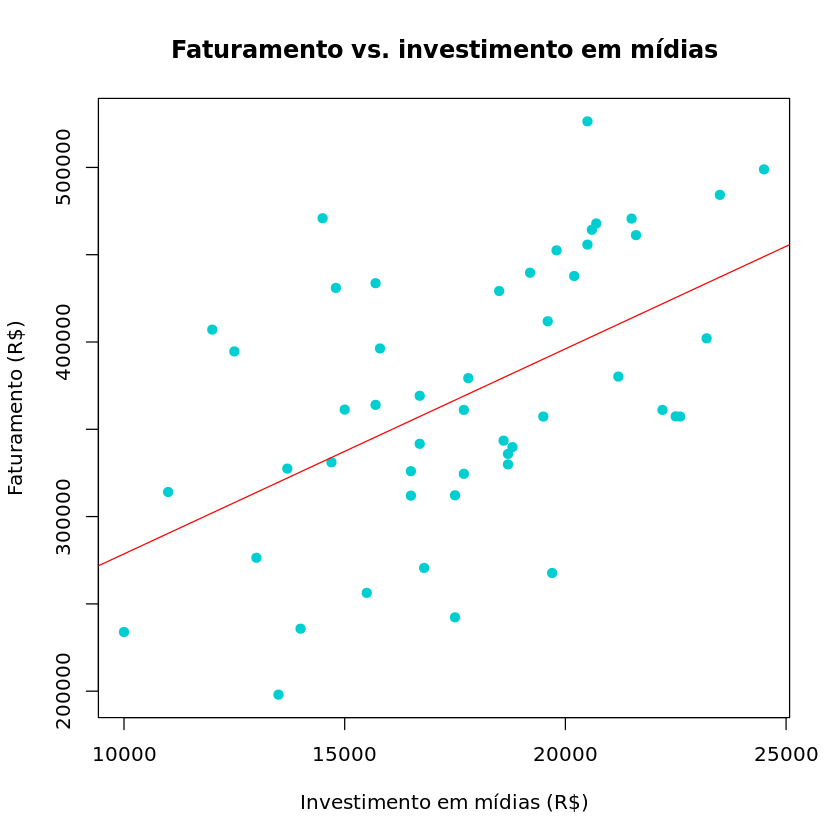

In [12]:
plot(x    = dados_faturamento$INVESTIMENTO,
     y    = dados_faturamento$FATURAMENTO,
     pch  = 19,
     col  = "darkturquoise",
     xlab = "Investimento em mídias (R$)",
     ylab = "Faturamento (R$)",
     main = "Faturamento vs. investimento em mídias")
points(abline(regressao,
              col = "red"))

### Qualidade de ajuste

In [13]:
# Coeficiente de determinação (R²)
summary(regressao)$r.squared

[1] 0.2721122

In [14]:
# MAE
sum(abs(regressao$residuals))/nrow(dados_faturamento)

[1] 55299.25

In [15]:
# MAPE
sum(abs(regressao$residuals/dados_faturamento$FATURAMENTO))/nrow(dados_faturamento)

[1] 0.1608009

### Análise de resíduos

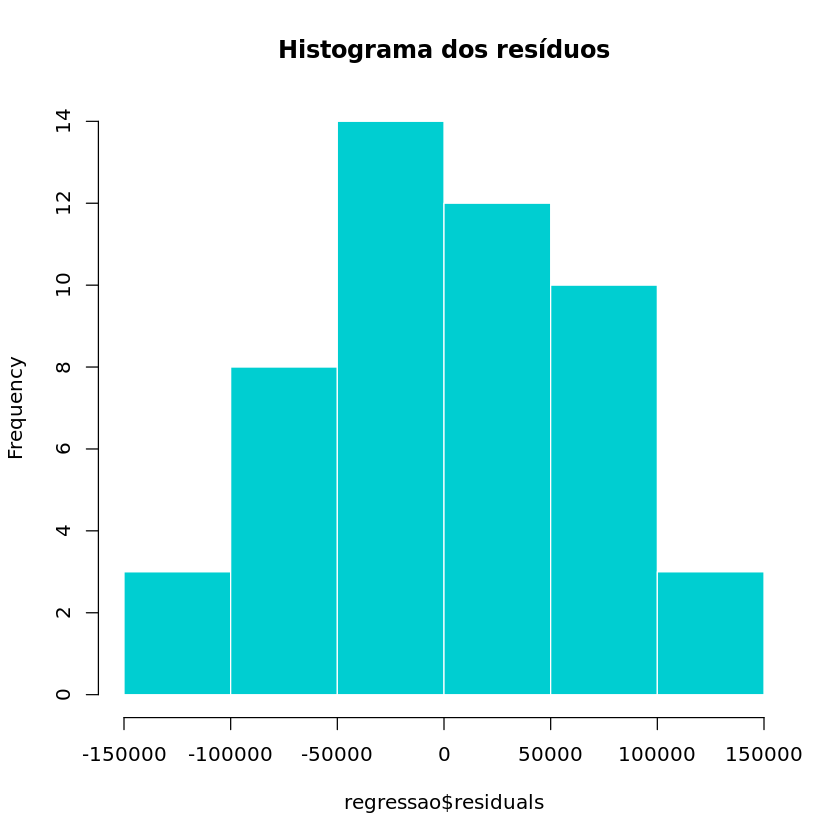

In [16]:
# Histograma dos resíduos
hist(x      = regressao$residuals,
     main   = "Histograma dos resíduos",
     col    = "darkturquoise",
     border = "white")

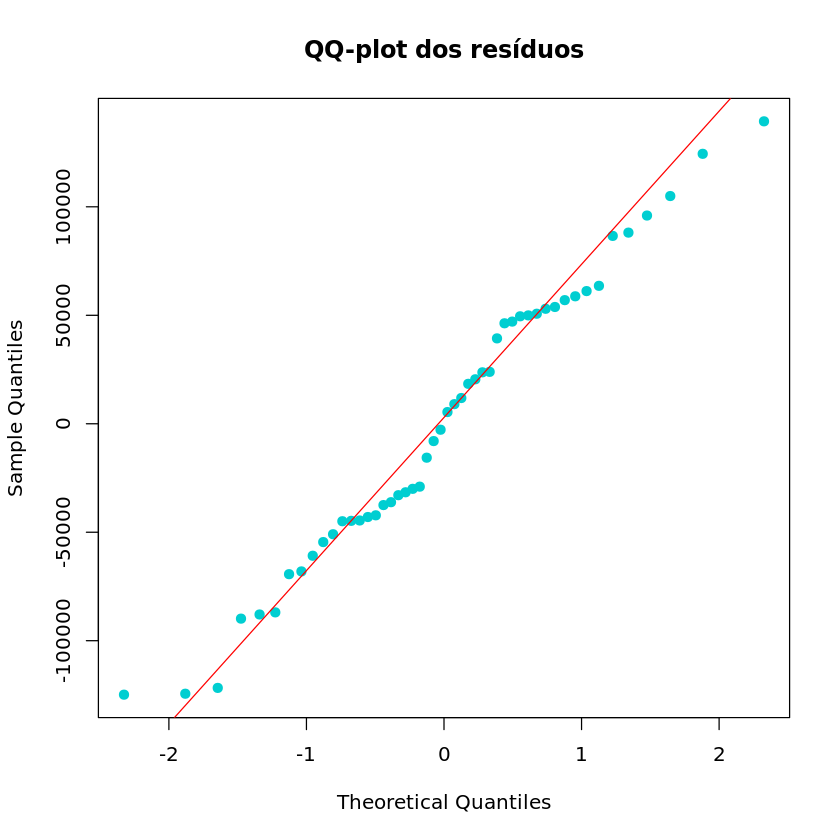

In [17]:
# QQ plot dos resíduos
qqnorm(y    = regressao$residuals,
       main = "QQ-plot dos resíduos",
       col  = "darkturquoise",
       pch  = 19)
qqline(y    = regressao$residuals,
       col  = "red")

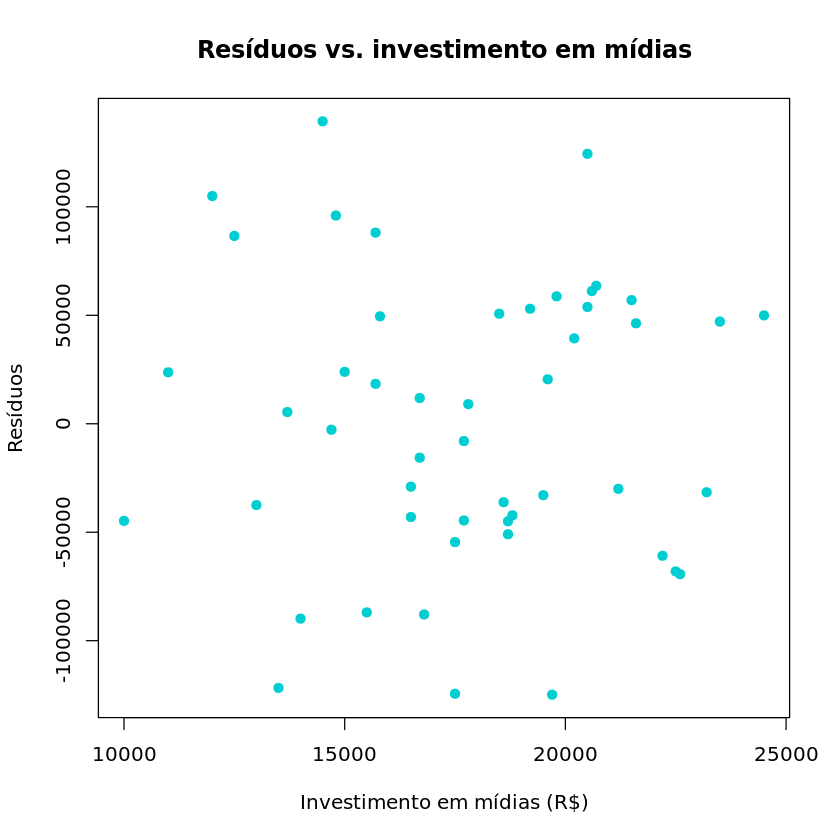

In [20]:
# Resíduos vs. investimento em mídias
plot(x    = dados_faturamento$INVESTIMENTO,
     y    = regressao$residuals,
     pch  = 19,
     col  = "darkturquoise",
     xlab = "Investimento em mídias (R$)",
     ylab = "Resíduos",
     main = "Resíduos vs. investimento em mídias")

### Exemplo de uso (aplicação) do modelo

In [21]:
# Criação de base de dados com um novo produto, com 18.000 reais de investimento em mídias
# Obs.: o nome de coluna deve ser idêntico ao da base utilizada para construção do modelo ("INVESTIMENTO")
novos_dados <- data.frame(INVESTIMENTO = c(18000))

In [22]:
# Aplicação do modelo
novos_dados$INVESTIMENTO_PREDITO <- predict(regressao, novos_dados)
View(novos_dados)

INVESTIMENTO,INVESTIMENTO_PREDITO
<dbl>,<dbl>
18000,372611
